In [48]:
import pandas as pd

# Load the dataset
file_path = 'data/dataset_gym_membership_group2.csv'
df = pd.read_csv(file_path)


df.columns = df.columns.str.replace(" ", "_")
# Display the first few rows of the dataset
df.head(), df.info(), df.describe(), df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   User_ID                5000 non-null   int64 
 1   Age                    5000 non-null   int64 
 2   Gender                 5000 non-null   object
 3   Annual_Income          5000 non-null   int64 
 4   Membership_Type        5000 non-null   object
 5   Membership_Duration    5000 non-null   int64 
 6   Frequency_of_Visit     5000 non-null   int64 
 7   Preferred_Time         5000 non-null   object
 8   Previous_Membership    5000 non-null   object
 9   Marital_Status         5000 non-null   object
 10  Location               5000 non-null   object
 11  Promotion_Response     5000 non-null   object
 12  Health_Condition       5000 non-null   object
 13  Membership_Prediction  5000 non-null   object
 14  Professional           5000 non-null   object
 15  Professional_Status  

(   User_ID  Age  Gender  Annual_Income Membership_Type  Membership_Duration  \
 0        1   56    Male         110848             VIP                   37   
 1        2   69    Male          42402         Premium                   55   
 2        3   46   Other          70426             VIP                   51   
 3        4   32    Male          70739         Premium                    4   
 4        5   60  Female          58097         Premium                   56   
 
    Frequency_of_Visit Preferred_Time Previous_Membership Marital_Status  \
 0                   3      Afternoon                  No        Married   
 1                   5      Afternoon                 Yes       Divorced   
 2                   5        Evening                  No         Single   
 3                   1      Afternoon                  No         Single   
 4                   3        Evening                  No         Single   
 
   Location Promotion_Response Health_Condition Membership_P

Gender gaps

In [49]:
df_gender_income=df.groupby('Gender')['Annual_Income'].agg(['mean', 'median','max', 'min','std','var']).reset_index()
print(df_gender_income)

   Gender          mean   median     max    min           std           var
0  Female  56944.079583  58697.0  120001  -2502  23070.365139  5.322417e+08
1    Male  69280.006620  71561.0  138234  -1600  27718.819785  7.683330e+08
2   Other  59626.519126  64441.0  109401  14245  20079.473533  4.031853e+08


In [50]:
df_gender_membtype=df.groupby('Gender')[['Membership_Type','Membership_Prediction']].value_counts()
print(df_gender_membtype)

Gender  Membership_Type  Membership_Prediction
Female  Premium          Yes                      577
                         No                       545
        VIP              No                       348
                         Yes                      324
        Basic            No                       315
                         Yes                      291
Male    VIP              Yes                      590
                         No                       571
        Premium          No                       429
                         Yes                      404
        Basic            Yes                      213
                         No                       210
Other   Premium          Yes                       58
                         No                        37
        VIP              No                        28
                         Yes                       27
        Basic            No                        17
                         Yes       

In [51]:
df_prev_membtypepred=df.groupby('Previous_Membership')[['Promotion_Response','Membership_Type','Membership_Prediction']].value_counts()
print(df_prev_membtypepred)

Previous_Membership  Promotion_Response  Membership_Type  Membership_Prediction
No                   No                  Premium          No                       492
                                                          Yes                      485
                                         VIP              Yes                      453
                                                          No                       444
                     Yes                 Basic            Yes                      241
                                                          No                       204
                     No                  Basic            No                        36
                                                          Yes                       26
                     Yes                 VIP              No                        18
                                                          Yes                       16
                                         Premium  

In [52]:
df_gender_location=df.groupby('Gender')['Location'].value_counts(normalize=True)
print(df_gender_location)

Gender  Location
Female  Urban       0.397917
        Suburban    0.306667
        Rural       0.295417
Male    Urban       0.401738
        Suburban    0.300372
        Rural       0.297890
Other   Urban       0.437158
        Rural       0.289617
        Suburban    0.273224
Name: proportion, dtype: float64


In [53]:
df_gender_pro=df.groupby('Gender')['Professional'].value_counts(normalize=True)
print(df_gender_pro)

Gender  Professional
Female  Employed        0.480417
        Late Career     0.183750
        Early Career    0.147500
        Student         0.098333
        Retired         0.090000
Male    Employed        0.476624
        Late Career     0.179975
        Early Career    0.146463
        Retired         0.103434
        Student         0.093504
Other   Employed        0.535519
        Late Career     0.202186
        Early Career    0.120219
        Retired         0.092896
        Student         0.049180
Name: proportion, dtype: float64


In [54]:
df_type_promo=df.groupby('Membership_Type')['Promotion_Response'].value_counts(normalize=True)
print(df_type_promo)

Membership_Type  Promotion_Response
Basic            Yes                   0.869115
                 No                    0.130885
Premium          No                    0.982927
                 Yes                   0.017073
VIP              No                    0.966631
                 Yes                   0.033369
Name: proportion, dtype: float64


In [55]:
df_pro_type=df.groupby('Professional')['Membership_Type'].value_counts(normalize=True)
print(df_pro_type)

Professional  Membership_Type
Early Career  Basic              0.612329
              Premium            0.308219
              VIP                0.079452
Employed      Premium            0.541407
              VIP                0.408240
              Basic              0.050354
Late Career   VIP                0.711939
              Premium            0.288061
Retired       Premium            0.517598
              VIP                0.387164
              Basic              0.095238
Student       Basic              0.951168
              VIP                0.025478
              Premium            0.023355
Name: proportion, dtype: float64


In [56]:
df_pro_income=df.groupby('Professional')['Annual_Income'].agg(['mean', 'median','max', 'min','std','var'])
print(df_pro_income)

                      mean   median     max    min           std           var
Professional                                                                  
Early Career  37777.919178  36542.0   69691  12552  11486.964806  1.319504e+08
Employed      69311.203496  68402.0  118169  27666  17555.590687  3.081988e+08
Late Career   87146.639650  85804.0  138234  43428  18626.000992  3.469279e+08
Retired       66693.501035  66465.0  115377  24809  19783.231440  3.913762e+08
Student       19355.995754  19045.0   47400  -2502  10741.325717  1.153761e+08


In [57]:
df_pro_health=df.groupby('Professional')['Health_Condition'].value_counts(normalize=True)
print(df_pro_health)

Professional  Health_Condition
Early Career  Excellent           0.283562
              Poor                0.249315
              Average             0.236986
              Good                0.230137
Employed      Poor                0.254682
              Average             0.253849
              Excellent           0.248023
              Good                0.243446
Late Career   Good                0.254107
              Average             0.251917
              Excellent           0.248631
              Poor                0.245345
Retired       Poor                0.277433
              Good                0.252588
              Excellent           0.248447
              Average             0.221532
Student       Average             0.267516
              Poor                0.250531
              Excellent           0.242038
              Good                0.239915
Name: proportion, dtype: float64


In [58]:
df_pro_age=df.groupby('Professional')['Age'].agg(['mean', 'median','max', 'min','std','var'])
print(df_pro_age)

                   mean  median  max  min       std        var
Professional                                                  
Early Career  26.546575    27.0   30   23  2.293582   5.260516
Employed      43.188098    43.0   55   31  7.164679  51.332631
Late Career   60.520263    61.0   65   56  2.886348   8.331003
Retired       67.927536    68.0   70   66  1.443589   2.083950
Student       20.025478    20.0   22   18  1.406440   1.978073


In [59]:
df_prof_type=df.groupby('Professional_Status')['Membership_Type'].value_counts(normalize=True)
print(df_prof_type)

Professional_Status  Membership_Type
In Education         Basic              0.951168
                     VIP                0.025478
                     Premium            0.023355
Retired              Premium            0.517598
                     VIP                0.387164
                     Basic              0.095238
Working              Premium            0.442165
                     VIP                0.417449
                     Basic              0.140386
Name: proportion, dtype: float64


In [60]:
df_marital_frq=df.groupby('Marital_Status')['Frequency_of_Visit'].value_counts(normalize=True)
print(df_marital_frq)

Marital_Status  Frequency_of_Visit
Divorced        2                     0.182588
                4                     0.174123
                5                     0.162636
                6                     0.160822
                1                     0.160218
                3                     0.159613
Married         2                     0.184258
                4                     0.166369
                1                     0.163983
                6                     0.163387
                3                     0.162194
                5                     0.159809
Single          2                     0.181546
                4                     0.178550
                3                     0.166567
                6                     0.164170
                5                     0.161774
                1                     0.147394
Name: proportion, dtype: float64


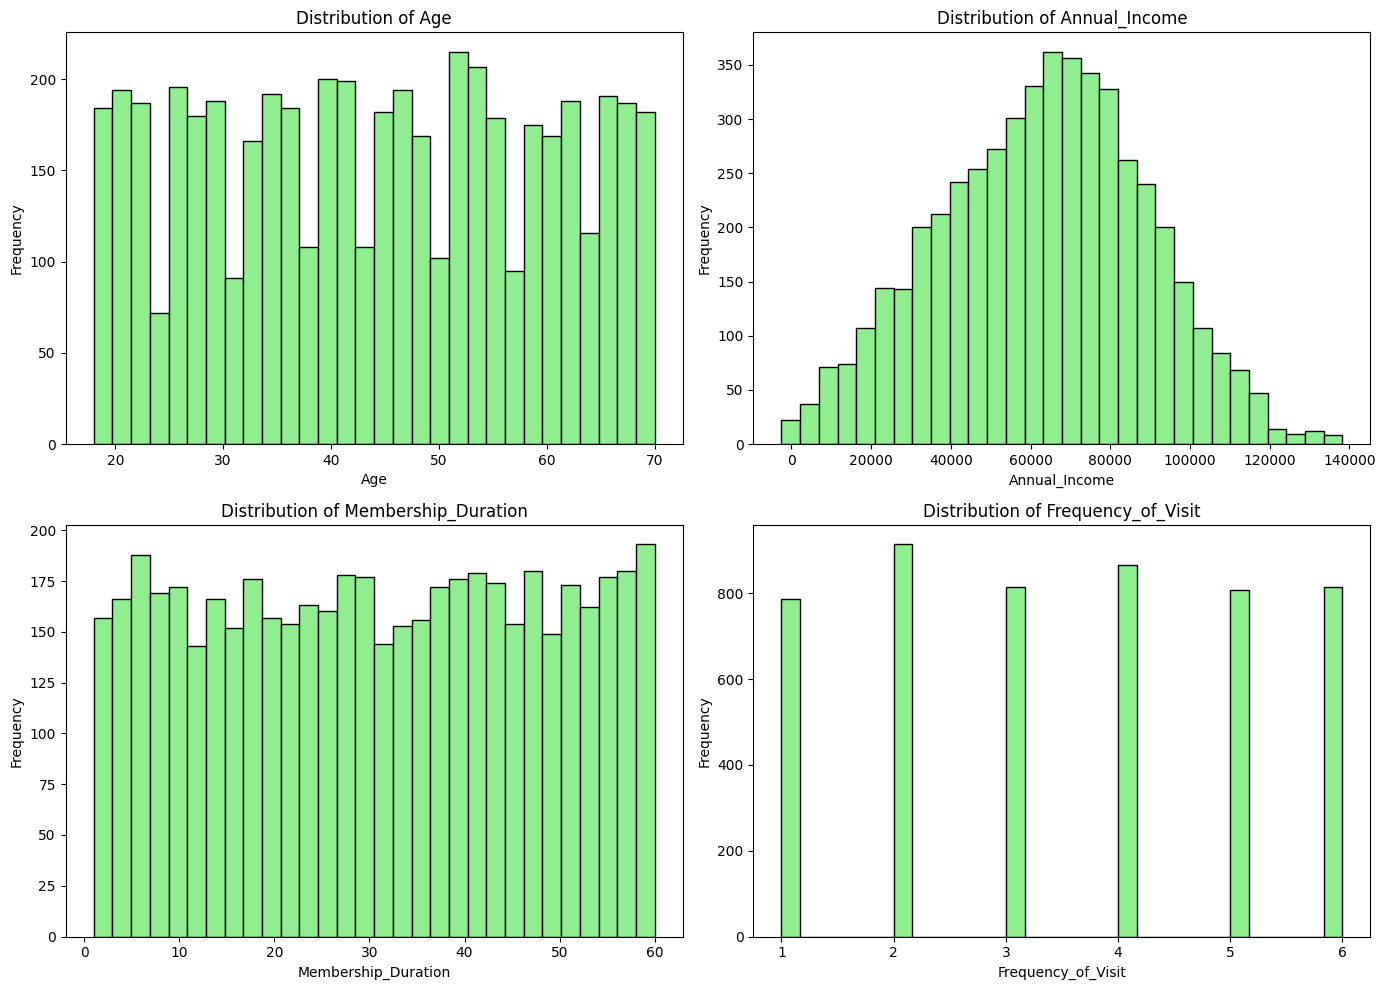

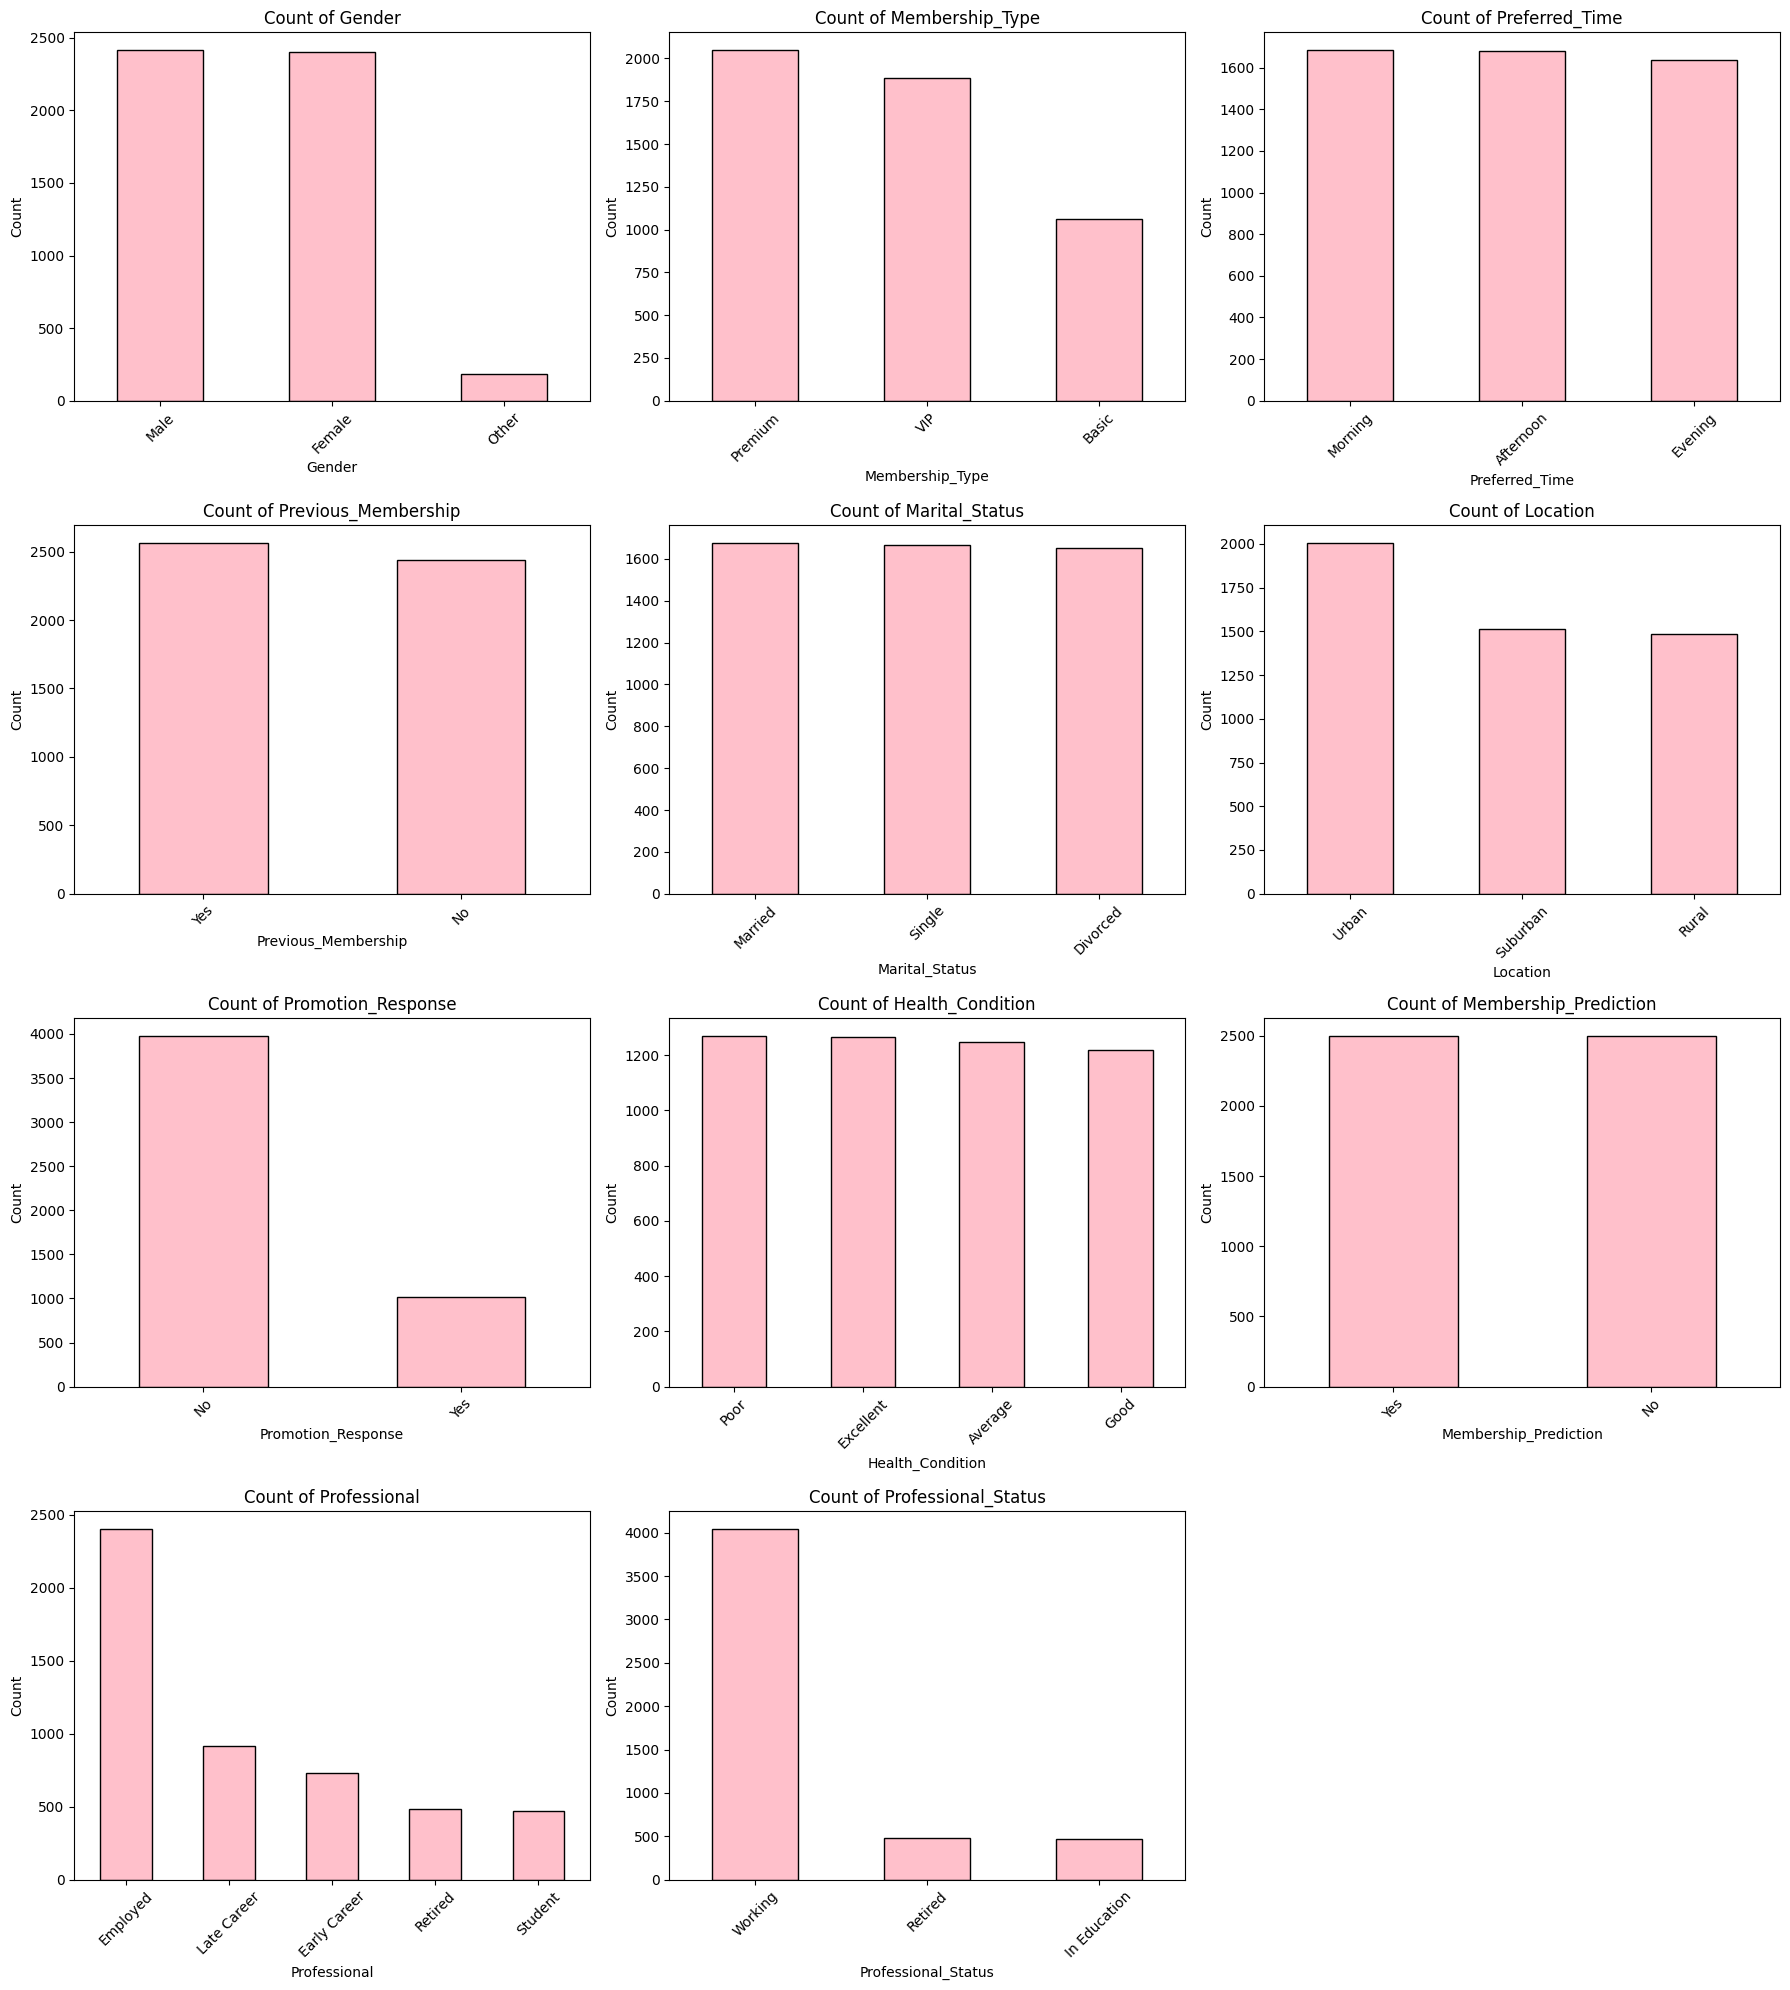

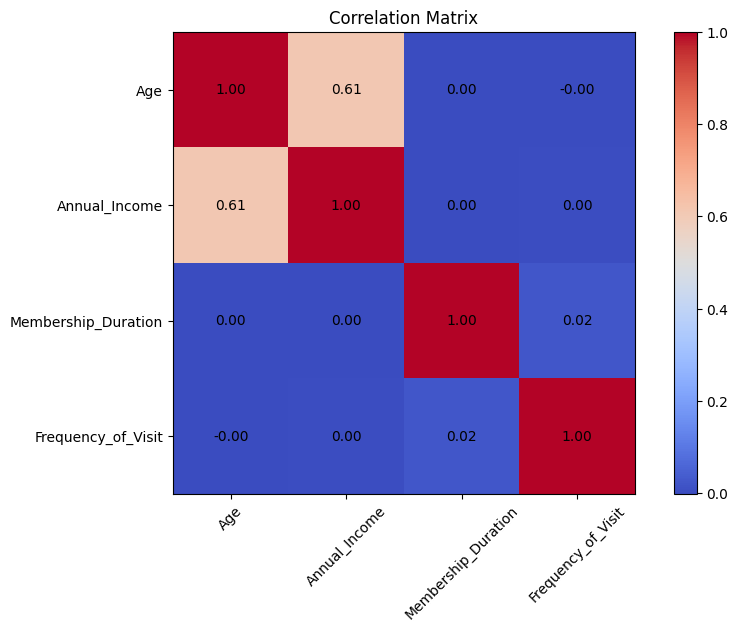

In [62]:
import matplotlib.pyplot as plt

# 1. Distribution of Numerical Variables
plt.figure(figsize=(14, 10))

numerical_cols = ['Age', 'Annual_Income', 'Membership_Duration', 'Frequency_of_Visit']

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    plt.hist(df[col], bins=30, color='lightgreen', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 2. Count Plots for Categorical Variables
plt.figure(figsize=(18, 20))

categorical_cols = ['Gender', 'Membership_Type', 'Preferred_Time', 'Previous_Membership', 
                    'Marital_Status', 'Location', 'Promotion_Response', 'Health_Condition', 
                    'Membership_Prediction', 'Professional', 'Professional_Status']

for i, col in enumerate(categorical_cols):
    plt.subplot(4, 3, i + 1)
    df[col].value_counts().plot(kind='bar', color='pink', edgecolor='black')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 3. Correlation Matrix for Numerical Variables
plt.figure(figsize=(10, 6))
corr_matrix = df[numerical_cols].corr()

plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(numerical_cols)), numerical_cols, rotation=45)
plt.yticks(range(len(numerical_cols)), numerical_cols)
plt.title('Correlation Matrix')

# Adding correlation coefficients on the heatmap
for i in range(len(numerical_cols)):
    for j in range(len(numerical_cols)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()

